   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

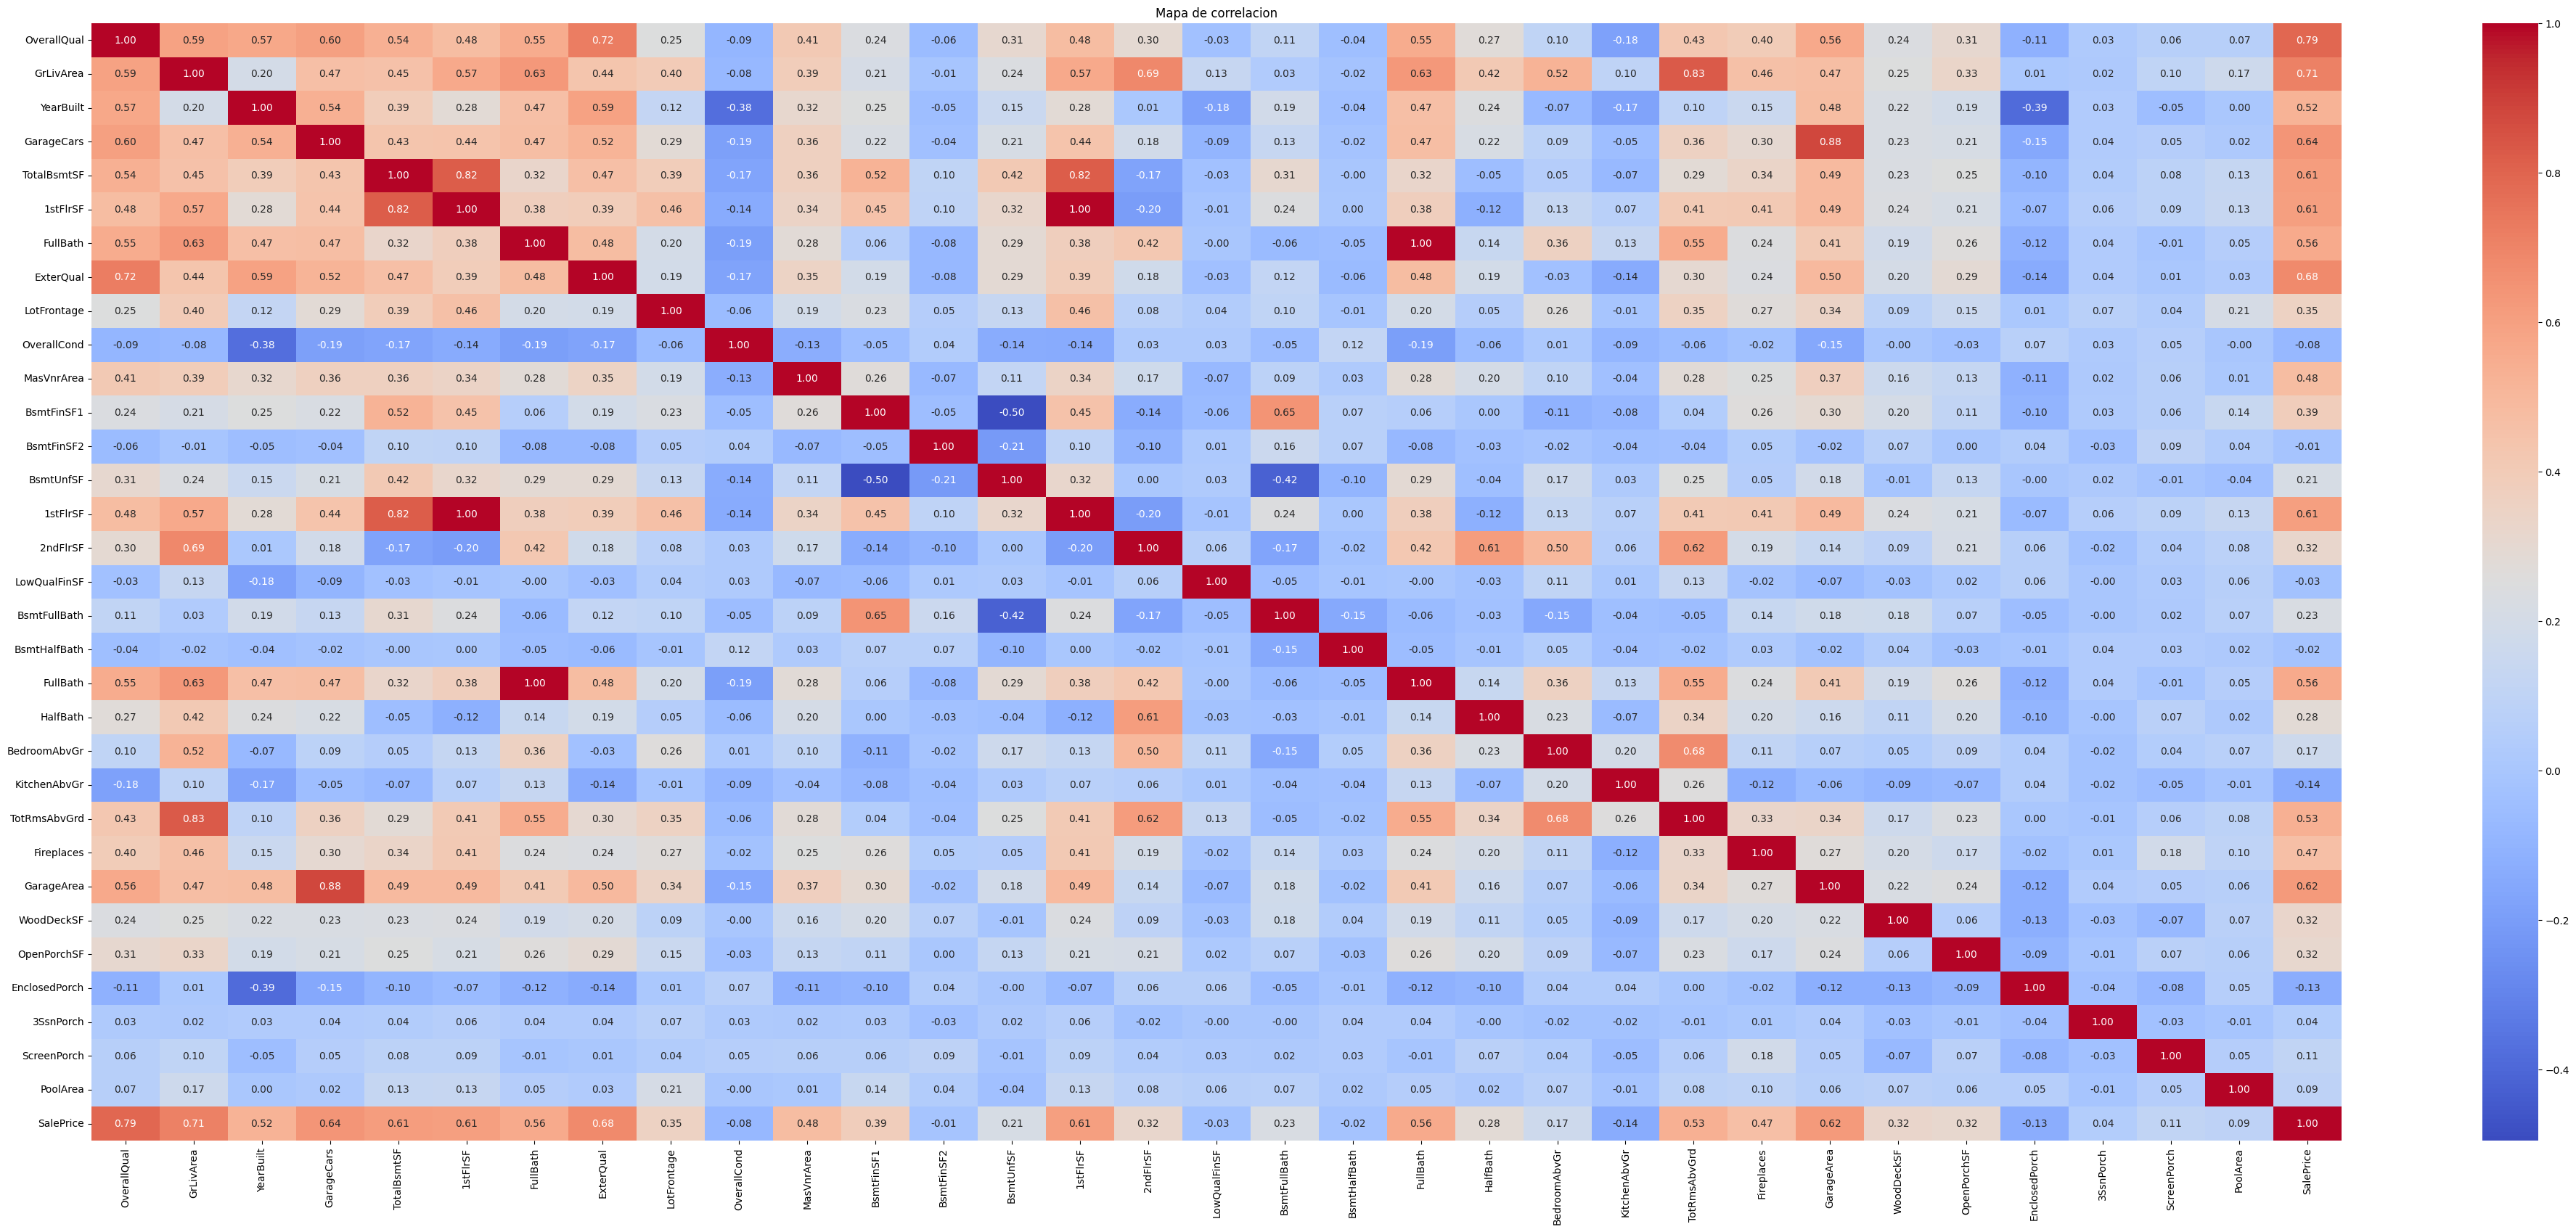

In [2]:
# Primero se importan todas las librerias necesarias para la guia. 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import SGDClassifier
# 1️⃣ EDA muy básico (indispensable)

# Se utiliza pandas para insertar la base de datos propuesta de propiedades. 
df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Machine learning 1\\train.csv")
#Visualizar las primeras 5 filas (df.head()).
print(df.head(5))
# Realizar una descripción estadística de las variables numéricas (df.describe()).
print(df.describe())
#Verificar tipos de datos y cantidad de valores nulos (df.info(), df.isnull().sum()).
print(df.info())
print(df.isnull().sum())

# El siguiente es el Mapa de calor. Se toman todas las variables númericas para ver las correlaciones.

df["ExterQual"] = df["ExterQual"].map({"Ex":5,"Gd":4,"TA":3,"FA":2,"Po":1})

variables = ["OverallQual","GrLivArea","YearBuilt","GarageCars","TotalBsmtSF","1stFlrSF","FullBath","ExterQual","LotFrontage",
             "OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF","BsmtFullBath",
             "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageArea","WoodDeckSF",
             "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","SalePrice"]

# Se determina que las variables con mayor correlación son las siguientes. 
variables2 = ["OverallQual","GrLivArea","TotalBsmtSF","YearBuilt","GarageCars","GarageArea","1stFlrSF","FullBath","TotRmsAbvGrd","LotArea"]
# la variables se convierte en un Data Frame para su graficación. 
datos = df[variables]
# Se dan los parametros para la graficación del mapa de calor usando Seaborn. 
matriz_correlacion = datos.corr()
plt.figure(figsize=(50,20))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlacion")
plt.show()
# 1. cuando tiene sotano, el primer piso tiende aumentar. ALTA
# 2. entre más reciente, propiedad de más alta calidad. ALTA
# 3. más área habitable, , más baños completos. ALTA
# 4. Más área habitable, garages granfes. Medio.
# 5. Garage, year built, overallqual. Medio.
#__________________________________________________________________________________________________________


In [46]:
# 2️⃣ Desafío 1: Regresión lineal

# 2. Definir el precio de venta (Sales price)

# Para empezar el modelo de regresión lineal determinamos los valores en X y Y.
x = df[variables2]
y= df["SalePrice"]

# Se utiliza is null para determinar si ha nulos.
#print(x.isnull().sum())

# Se utiliza imputer de pandas con el promedio, en el caso de X
imputer = SimpleImputer(strategy="mean")
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
#print(x.isnull().sum())

# Se utiliza imputer de pandas con el promedio, en el caso de Y
y = pd.DataFrame(y)
imputer = SimpleImputer(strategy="mean")
y = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)
#print(y.isnull().sum())



# Se entrena el modelo con parte de testeo y parte de entrenamiento. Con un cantidad de prueba del 0.2
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2, random_state=42)

# Se escalan los datos. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)  # Ajustar y transformar el conjunto de entrenamiento
X_test_scaled = scaler.transform(x_test) 

# Se crea el modelo
model = LinearRegression()
# Se entrena el modelo 
model.fit(x_train, y_train)
# Se imprimen los coeficientes.

df["SalePrice_Predicted"]= model.predict(x)

# Predicicones del modelo. Se evalua el rendimiento del modelo.

y_pred = model.predict(x_test)




In [47]:
# Predicicones del modelo. Se evalua el rendimiento del modelo.

y_pred = model.predict(x_test)


# Se imprimen los coeficientes y los interceptos del modelo.
print("CO", model.coef_)
print("IN", model.intercept_)


# Se calculan las métricas para testear la viabilidad del modelo. 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Se imprimen los resultados.
print(f"R² (Coeficiente de determinación lineal): {r2:.2f}")
print(f"MAE (Error absoluto medio lineal): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio lineal): {rmse:.2f}")


# Obtener la pendiente (m) y la intersección (b) de la recta ajustada
m = model.coef_[0]
b = model.intercept_

# Imprimir la ecuación de la recta
print(f"Ecuación de la recta: Y = {m}X + {b}")

CO [[ 2.16983606e+04  4.48907159e+01  1.24599020e+01  3.72846758e+02
   1.12709112e+04  1.24319454e+01  1.19341697e+01 -5.11837561e+03
   5.49706774e+02  6.24982445e-01]]
IN [-810223.79691522]
R² (Coeficiente de determinación lineal): 0.80
MAE (Error absoluto medio lineal): 24510.16
RMSE (Raíz del error cuadrático medio lineal): 39487.00
Ecuación de la recta: Y = [ 2.16983606e+04  4.48907159e+01  1.24599020e+01  3.72846758e+02
  1.12709112e+04  1.24319454e+01  1.19341697e+01 -5.11837561e+03
  5.49706774e+02  6.24982445e-01]X + [-810223.79691522]


En esta regresión lineal se observa que los coeficientes de las variables aumentan el valor de la propiedad, por cada unidad añadida, entre 11.000 dolares a 62 mil dolares, excepto por la variable fullbath que disminuye el precio en -5000 dolares.

el intercepto se encuentra en IN [-810223.79691522] el precio cuando los valores están en 0

para los coefientes R2:  0.80    explica que el modelo predice el 80% de los datos lo cual es bueno, en este caso.
MAE: 24510.16                    Se refiere a que el MAE muestra un error de 24 mil dolares para algunas propiedades.
RMSE: 39487.00                   Se refiere a que el RMSE muestra un error de 39 mil dolares para algunas propiedades.
Lo cual sugiere que hay algunos datos atípicos, o valores predichos lejanos a los datos reales.

In [48]:
# Practica: 

nueva_casa = [[1,4000,1000,2000,150,2,400,3,4,3000]]
nueva_casa2 = [[3,4000,1000,2000,150,2,400,3,4,3000]]
precio_estimado= model.predict(nueva_casa)
precio_estimado2= model.predict(nueva_casa2)
print("Precio estimado", precio_estimado)
print("Precio estimado2", precio_estimado2)


# Para practicar se carga la base de datos Train.CSV
nueva_base = pd.read_csv("c:\\Users\\Lenovo\\Documents\\Machine learning 1\\test.csv")

# Se nombra la nueva base de datos, y solo se utilizan las variables utilizadas en el modelo de regresion lineal.
nueva_base = nueva_base[variables2]
# Se imputa los datos en la nueva base de datos.
imputer = SimpleImputer(strategy="mean")
imputer.fit(x)
# Se reconstruye el data frame con la imputacion. 
nueva_base = pd.DataFrame(imputer.transform(nueva_base), columns=nueva_base.columns)
# Se crea una columna donde se predice el precio
nueva_base["Sales_predicted"] = model.predict(nueva_base)
# Para verificar se crea un CSV con los nuevos resultados. 
nueva_base.to_csv("nueva_base_predicha.csv", index=False)

Precio estimado [[1833344.71035285]]
Precio estimado2 [[1876741.43159985]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Se hacen ejercicio de prueba para estimar precios dandole valores de las 10 variables. 

Y se carga la base de datos test, para predecir y se pasa a formato csv para verla en Excel.

In [49]:
#"Nivel avanzado: entrenar un SGDRegressor y comparar las métricas obtenidas para ver diferencias en rendimiento."

# Se realiza el escalado de datos para realizar el SGDRegressor. 
scaler = StandardScaler()
x_train_regressor = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

# Se crea el modelo de SGDRegressor, que itere hasta 1000, tol para detener la iteración, regularización del modelo, la semilla aleatoria.
sgdmodel = SGDRegressor(max_iter=1000,tol=1e-3, penalty="l2",random_state=42)



# Entrenar el modelo de entrenamiento
sgdmodel.fit(x_train_regressor, y_train)
# Predicciones con los datos de prueba
y_prediccion = sgdmodel.predict(x_test_scaled)

# Se realiza la evaluación del modelo.
R2 = sgdmodel.score(x_test_scaled, y_test)
MAE2 = mean_absolute_error(y_test,y_prediccion)
MSE2 = mean_squared_error  (y_test, y_prediccion)
RMSE2 = MSE2**0.5

df["Sales_regressor"] = sgdmodel.predict(x)

# Se imprimen los coeficientes
print("CO", sgdmodel.coef_)
print("IN", sgdmodel.intercept_)


CO [29055.73486934 21251.32391983  3712.22686717 10589.42304965
  7316.37910723  2539.48960095  2645.82957228 -3246.60758957
   490.09689731  5888.5000908 ]
IN [181181.79206807]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


En esta regresión lineal con SGDRegressor se observa que los coeficientes de las variables aumentan el valor de la propiedad, por cada unidad añadida, entre 2.000 dolares a 29 mil dolares, excepto por la variable fullbath que disminuye el precio en -3000 dolares.

el intercepto se encuentra en IN [181181.79206807] cuando los valores están en 0 ese es el valor.



In [50]:
# Se imprimen las evaluaciones del modelo.
print(f"R² (Coeficiente de determinación Regressor): {R2:.2f}")
print(f"MAE (Error absoluto medio Regressor): {MAE2:.2f}")
print(f"RMSE (Raíz del error cuadrático medio Regressor): {RMSE2:.2f}")

R² (Coeficiente de determinación Regressor): 0.77
MAE (Error absoluto medio Regressor): 24841.81
RMSE (Raíz del error cuadrático medio Regressor): 42068.42


para los coefientes R2:  0.77    explica que el modelo predice el 80% de los datos lo cual es bueno, en este caso.
MAE: 24510.16                    Se refiere a que el MAE muestra un error de 24 mil dolares para algunas propiedades.
RMSE: 39487.00                   Se refiere a que el RMSE muestra un error de 39 mil dolares para algunas propiedades.
Lo cual sugiere que hay algunos datos atípicos, o valores predichos lejanos a los datos reales.

In [51]:
# Se realiza una prueba aleatoria igual al modelo de regresion lineal, hecho anteriormente.
nueva_casa = [[1,4000,1000,2000,150,2,400,3,4,3000]]
nueva_casa2 = [[1,4000,1000,2000,150,2,400,3,4,3000]]

# Se imprimen los resultados.
precio_estimado3 = sgdmodel.predict(nueva_casa)
precio_estimado4 = sgdmodel.predict(nueva_casa2)
print("Precio estimado3 Regressor", precio_estimado)
print("Precio estimado4 Regressor", precio_estimado2)

Precio estimado3 Regressor [[1833344.71035285]]
Precio estimado4 Regressor [[1876741.43159985]]


Ejercicios de practica con SGDRegressor.

In [52]:
#3️⃣ Desafío 2: Regresión logística
#Crear una nueva variable binaria (HighPrice) que clasifique precios altos y bajos respecto al promedio.

# Se crea el precio promedio 
precio_promedio = df["SalePrice"].mean()
# Agregamos la columna PriceLabel, y se usa .apply y lambda para crear una condicional.
df["PriceLabel"] = df["SalePrice"].apply(lambda x: "HighPrice" if x  >= precio_promedio else "LowPrice" )
# Se imprimen los resultados. 
print(f"precio promedio general: {precio_promedio:.2f}")
print(df[["SalePrice","PriceLabel"]].head())

# Entrenar un modelo de regresión logística.

Y = df["PriceLabel"]
X = df[variables2]

X = pd.DataFrame(X)
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print(X.isnull().sum())

# Se dividen los datos para el entrenamiento del modelo.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)


# Se crea  el model ode regresión logística
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)



# Se crea la variable predictiva de Y.
Y_pred = logistic.predict(X_test)

# Se crean e imprimen números de prueba.
Prediccion_Y = logistic.predict(X_test)
Probabilidad_Y = logistic.predict_proba(X_test)
print("predicciones", Prediccion_Y[:10])
print("probabilidad", Probabilidad_Y[:10])


precio promedio general: 180921.20
   SalePrice PriceLabel
0     208500  HighPrice
1     181500  HighPrice
2     223500  HighPrice
3     140000   LowPrice
4     250000  HighPrice
OverallQual     0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
GarageCars      0
GarageArea      0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
LotArea         0
dtype: int64
predicciones ['LowPrice' 'HighPrice' 'LowPrice' 'LowPrice' 'HighPrice' 'LowPrice'
 'HighPrice' 'LowPrice' 'LowPrice' 'LowPrice']
probabilidad [[2.73495778e-02 9.72650422e-01]
 [9.98409380e-01 1.59062007e-03]
 [1.75333898e-02 9.82466610e-01]
 [2.89574913e-01 7.10425087e-01]
 [9.98293265e-01 1.70673454e-03]
 [1.18701766e-04 9.99881298e-01]
 [7.57820301e-01 2.42179699e-01]
 [8.82615463e-02 9.11738454e-01]
 [1.25854981e-04 9.99874145e-01]
 [1.52625500e-02 9.84737450e-01]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


En esta parte del código se ejecuta la regresión logística etiquetando  las propiedad en Low Price o High Price, de una forma binaria.
se toman los 10 primeros datos de prueba clasificandolos.


In [53]:
# Se crea accuracy
accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy logística:{accuracy:.2f}")

# Se crea la matrix de confusión
matrix = confusion_matrix(Y_test,Y_pred)
print(f"matrix de confusion logística:{matrix}")

# Se crea el F1 Score.
F1 = f1_score(Y_test, Y_pred, average="weighted")
print(f"F1-Score logística: {F1:.2f}")
# Se guardan los datos en un nuevo CSV.

df.to_csv("nombre_del_archivo.csv", index=False)
print("Archivo CSV guardado exitosamente")
import os
print(os.getcwd())

Accuracy logística:0.92
matrix de confusion logística:[[ 92  15]
 [  8 177]]
F1-Score logística: 0.92
Archivo CSV guardado exitosamente
c:\Users\Lenovo\Documents


- Logistic regression: Para el caso del accuracy el modelo etiqueta en un 92% de manera adecuada las etiquetas de Low a high price. 
- En el caso de la Matrix de confusion el modelo clasifico de manera adecuada 92 etiquetas negativas y 177 etiquetas positivas.
  Además, el modelo predijo 15 casos como etiquetas negativas que son positivas, y 8 etiquetas negativas que son positivas.
- Finalmente, un F1 de 92% demuestra un equilibrio entre precisión y recall.
  



In [54]:
#Nivel avanzado: implementar un SGDClassifier y comparar métricas para evaluar la mejora o diferencia respecto al modelo clásico.

# Se  crea la variable para el SGDClassifier.
Classifier = SGDClassifier(loss="log_loss",max_iter=1000,random_state=42)

# Se entrena el modelo con los elementros de prueba.
Classifier.fit(X_train, Y_train)
#Se realizan las predicciones
Y_Classifier = Classifier.predict(X_test)


In [55]:
# Se crea accuracy
accuracy1 = accuracy_score(Y_test,Y_Classifier)
print(f"Accuracy Classifier:{accuracy1:.2f}")

# Se crea la matrix de confusión
matrix1 = confusion_matrix(Y_test,Y_Classifier)
print(f"matrix de confusion Classifier:{matrix1}")

# Se crea el F1 Score.
F11 = f1_score(Y_test, Y_Classifier, average="weighted")
print(f"F1-Score Classifier: {F11:.2f}")

Accuracy Classifier:0.87
matrix de confusion Classifier:[[ 86  21]
 [ 18 167]]
F1-Score Classifier: 0.87


- SGD Classifier: Para el caso del accuracy el modelo etiqueta en un 87% de manera adecuada las etiquetas de Low a high price. 
- En el caso de la Matrix de confusion el modelo clasifico de manera adecuada 86 etiquetas negativas y 167 etiquetas positivas.
  Además, el modelo predijo 21 casos como etiquetas negativas que son positivas, y 18 etiquetas negativas que son positivas.
- Finalmente, un F1 de 87% demuestra un equilibrio entre precisión y recall.

Los dos dan buenos resultados, sin embargo, uitlizando logistic regression el modelo es más accurate.

In [56]:
df["Sales_predicted_logistica"]= logistic.predict(x)
df["Sales_predicted_logistica_Classifier"]= Classifier.predict(x)
df.to_csv("nombre_del_archivo.csv", index=False)
print("Archivo CSV guardado exitosamente")
import os
print(os.getcwd())

# Se imputa los datos en la nueva base de datos.
imputer = SimpleImputer(strategy="mean")
imputer.fit(X)
# Se reconstruye el data frame con la imputacion. 
nueva_base = nueva_base.drop(columns=["Sales_predicted","Sales_predicted_logistica"], errors="ignore")
nueva_base = pd.DataFrame(imputer.transform(nueva_base), columns=nueva_base.columns)
# Se crea una columna donde se predice el precio
nueva_base["Sales_predicted_logistica"] = logistic.predict(nueva_base)
nueva_base_for_classifier = nueva_base.drop(columns=["Sales_predicted_logistica"], errors="ignore")
nueva_base["Sales_predicted_logistica_Classifier"] = Classifier.predict(nueva_base_for_classifier)
# Para verificar se crea un CSV con los nuevos resultados. 
nueva_base.to_csv("nueva_base_predicha2.csv", index=False)

Archivo CSV guardado exitosamente
c:\Users\Lenovo\Documents


Se crea una base de datos en CSV para ver los resultados predichos con los reales.

4️⃣ Conclusión reflexiva
¿Qué variables fueron las más influyentes en cada modelo y por qué?

En el modelo de regresión lineal la variable más influyente fue el LotArea (area del lote) dado que cada unidad sumada a esta variable, aumentaba el precio en aproximadamente 62 mil dolares.

En el modelo de regresion lineal usando SGDRegressor la variable más influyente fue OverallQual dado que cada unidad sumada a esta variable aumentaba el precio en 29 mil dolares. 

Para el caso de la regresión logística dado que es un modelo binario, se percibe que el modelo es eficiente en un 92% utilizando 
Logistic_regression y con Classifier es eficiente en un 89%.

¿Qué tan buenos fueron los resultados y qué diferencias observaste al usar gradiente descendente?

Los resultados en forma general fueron bueno superando el 80% de efectividad en casi todas las métricas, exceptuando en el modelo de regresion lineal que utilizo el SGD regresor. Aquí las métricas: 

para los coefientes R2:  0.80 
para los coefientes Regressor R2:  0.77  
Accuracy logística:0.92
Accuracy Classifier:0.87
F1-Score logística: 0.92
F1-Score Classifier: 0.87

Cuando se usó el gradiante descendente vemos que la eficiencia baja en un 5% respecto a la regresión logística normal. Esto se puede deber a que la regresión lineal hace un análisis analítico óptimo, sin embargo, con el classifier depende de variables con la iteración.


¿Qué mejorarías o harías diferente en futuros proyectos similares?

- Como primera medida realizar un EDA con mayor profunidad realizando las imputaciones necesarias.
- Segundo, tener en cuenta las dos bases de datos, ya que con las dos bases de datos train y test hacer el modelo era más fácil.
- Tercero, hacer un mapa de calor con todas las variables númericas desde el principio, así se verá las correlaciones entre las variables más claramente, esta vez se escogieron pequeños grupos de variables para hacer el mapa de calor, sin agregarlas todas de una vez.
- Cuarto, usaría un formato ipynb en vez de py dado que py ejecuta todo el código, y puede llevar a modelos, en cambio con jupiter el código se ejecuta por parte. 
- En futuros proyectos y ya teniendo más claros los conceptos se puede estructurar mejor los pasos a seguir:
  Realizar un EDA Completo, elegir los modelos más adecuados, medir el modelo, y crear ejemplos o alimentar el modelo con base de datos similares, para predecir esta nueva base de datos. 

